# Feature extraction using SimpleITK
We can use [SimpleITK](https://simpleitk.readthedocs.io/) for extracting features from label images. For convenience reasons we use the [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) library.

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install scikit-image napari-simpleitk-image-processing stackview seaborn pandas

In [1]:
import pandas as pd
from skimage.io import imread
import stackview
from skimage import measure
from skimage import filters
from napari_simpleitk_image_processing import label_statistics
import seaborn as sns

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
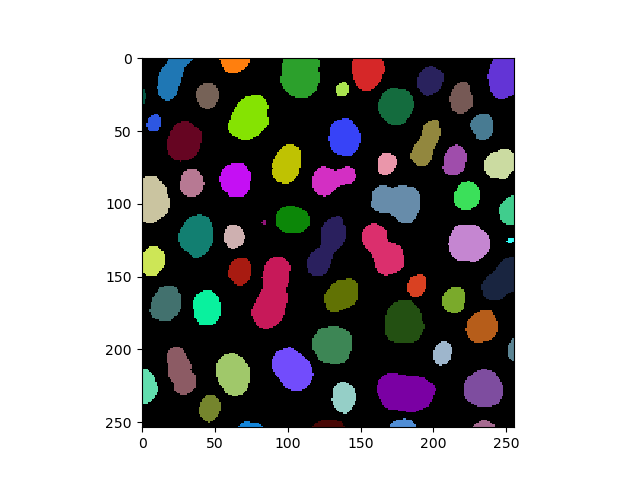

In [2]:
# load image
image = imread('https://github.com/haesleinhuepf/stackview/blob/main/docs/data/blobs.tif?raw=true', plugin='tifffile')

# denoising
blurred_image = filters.gaussian(image, sigma=1)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
label_image = measure.label(thresholded_image)

# visualization
stackview.insight(label_image)

## Measurements/ region properties

We are now using the very handy function `label_statistics` which provides a table of features. Let us check first what we need to provide for this function:

In [3]:
label_statistics?

Signature:
label_statistics(
    intensity_image: 'napari.types.ImageData',
    label_image: 'napari.types.LabelsData',
    size: bool = True,
    intensity: bool = True,
    perimeter: bool = False,
    shape: bool = False,
    position: bool = False,
    moments: bool = False,
    napari_viewer: 'napari.Viewer' = None,
) -> 'pandas.DataFrame'
Docstring:
Measure intensity/shape/... statistics per label

Parameters
----------
intensity_image: ndarray, optional
    Can be None
label_image: ndarray
    Must be subsequently labeled
size: bool, optional
intensity: bool, optional
perimeter: bool, optional
shape: bool, optional
position: bool, optional
moments: bool, optional
napari_viewer: napari.Viewer, optional

Returns
-------
pandas DataFrame, in case napari_viewr is None, otherwise the DataFrame will be added to
the passed label_image's layer.features


See Also
--------
..[0] https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelShapeStatisticsImageFilter
..[1] http://i

Feature categories which have are set to `True` are measured by default. In this case, the categories are `size` and `intensity`. But the rest might be also interesting to investigate. So we need them to `True` as well:

In [4]:
df = pd.DataFrame(label_statistics(image, label_image,  
                              shape=True, 
                              perimeter=True, 
                              position=True,
                              moments=True))

df

,label,maximum,mean,median,minimum,sigma,sum,variance,bbox_0,bbox_1,...,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio,principal_axes0,principal_axes1,principal_axes2,principal_axes3,principal_moments0,principal_moments1
0,1,232.0,191.440559,200.0,128.0,29.827923,82128.0,889.704987,10,0,...,16,87.070368,16.0,0.183759,0.905569,0.424199,-0.424199,0.905569,17.336255,75.599678
1,2,224.0,179.846995,184.0,128.0,21.328889,32912.0,454.921516,53,0,...,21,53.456120,21.0,0.392846,-0.042759,-0.999085,0.999085,-0.042759,8.637199,27.432794
2,3,248.0,205.604863,208.0,120.0,29.414615,135288.0,865.219581,95,0,...,23,93.409370,23.0,0.246228,0.989650,0.143505,-0.143505,0.989650,49.994764,56.996778
3,4,248.0,217.515012,232.0,120.0,35.893817,94184.0,1288.366094,144,0,...,20,76.114262,20.0,0.262763,0.902854,0.429947,-0.429947,0.902854,33.290649,37.542552
4,5,248.0,213.033898,224.0,128.0,28.771575,100552.0,827.803519,237,0,...,39,82.127941,40.0,0.487045,0.999090,0.042642,-0.042642,0.999090,24.209327,60.391416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,224.0,184.525822,192.0,120.0,28.322029,39304.0,802.137302,39,232,...,0,52.250114,0.0,0.000000,0.976281,0.216509,-0.216509,0.976281,13.084485,21.981750
58,59,248.0,184.810127,184.0,128.0,33.955505,14600.0,1152.976306,170,248,...,18,39.953250,18.0,0.450527,-0.012197,-0.999926,0.999926,-0.012197,2.075392,20.902016
59,60,216.0,182.727273,184.0,128.0,24.557101,16080.0,603.051202,117,249,...,22,46.196967,22.0,0.476222,-0.014920,-0.999889,0.999889,-0.014920,1.815666,29.359308
60,61,248.0,189.538462,192.0,128.0,38.236858,9856.0,1462.057315,227,249,...,15,32.924135,15.0,0.455593,-0.013675,-0.999906,0.999906,-0.013675,1.592570,12.843450


These are all columns that are available:

In [5]:
print(df.keys())

Index(['label', 'maximum', 'mean', 'median', 'minimum', 'sigma', 'sum',
       'variance', 'bbox_0', 'bbox_1', 'bbox_2', 'bbox_3', 'centroid_0',
       'centroid_1', 'elongation', 'feret_diameter', 'flatness', 'roundness',
       'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1',
       'equivalent_spherical_perimeter', 'equivalent_spherical_radius',
       'number_of_pixels', 'number_of_pixels_on_border', 'perimeter',
       'perimeter_on_border', 'perimeter_on_border_ratio', 'principal_axes0',
       'principal_axes1', 'principal_axes2', 'principal_axes3',
       'principal_moments0', 'principal_moments1'],
      dtype='object')


In [6]:
df.describe()

,label,maximum,mean,median,minimum,sigma,sum,variance,bbox_0,bbox_1,...,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio,principal_axes0,principal_axes1,principal_axes2,principal_axes3,principal_moments0,principal_moments1
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,233.548387,190.429888,196.258065,125.161290,28.767558,69534.451613,864.079980,121.532258,112.629032,...,5.564516,67.071263,5.580645,0.102864,0.703539,-0.114112,0.114112,0.703539,20.742486,43.535735
std,18.041619,19.371838,15.382559,19.527144,4.602898,6.091478,42911.182492,311.860596,80.574925,76.921129,...,9.667625,23.507575,9.724986,0.173858,0.459158,0.537821,0.537821,0.459158,13.092549,32.666912
min,1.000000,152.000000,146.285714,144.000000,112.000000,6.047432,1024.000000,36.571429,0.000000,0.000000,...,0.000000,9.155272,0.000000,0.000000,-0.651619,-0.999926,-0.660963,-0.651619,0.489796,0.571429
25%,16.250000,232.000000,182.969505,186.000000,120.000000,26.561523,36010.000000,705.524752,53.000000,43.250000,...,0.000000,52.551616,0.000000,0.000000,0.752633,-0.624188,-0.318631,0.752633,11.068721,22.027192
50%,31.500000,240.000000,190.749492,200.000000,128.000000,29.089645,71148.000000,846.217207,121.000000,110.500000,...,0.000000,68.204464,0.000000,0.000000,0.937869,0.040942,-0.040942,0.937869,18.744728,35.367902
75%,46.750000,248.000000,199.725305,208.000000,128.000000,32.583571,99962.000000,1061.691674,197.250000,172.250000,...,12.500000,84.307520,12.500000,0.184963,0.994807,0.318631,0.624188,0.994807,29.519182,56.938641
max,62.000000,248.000000,220.026144,240.000000,136.000000,38.374793,177944.000000,1472.624704,251.000000,250.000000,...,39.000000,125.912897,40.000000,0.487045,1.000000,0.660963,0.999926,1.000000,49.994764,186.225041


## Plot results

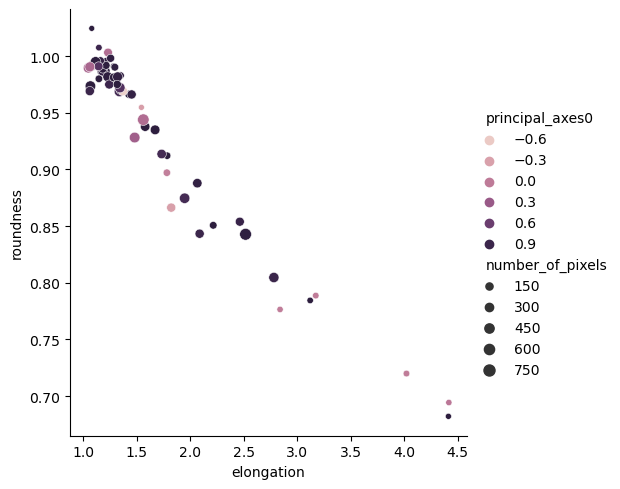

In [7]:
sns.relplot(data=df, x="elongation", y="roundness", size="number_of_pixels", hue="principal_axes0")

## Exercise

plot `principal_axes0` vs.	`principal_axes1`